In [220]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('Data_Negara_HELP.csv')

df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [221]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [222]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final

In [223]:
print(finding_outlier(df['Kesehatan']))
print(finding_outlier(df['Pendapatan']))

101    14.2
159    17.9
Name: Kesehatan, dtype: float64
23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
145     55500
157     57600
Name: Pendapatan, dtype: int64


In [224]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
  return df_final

In [225]:
df2 = remove_outlier(df[['Kesehatan', 'Pendapatan']])

df2.dropna(axis=0, inplace=True)
df2

,Kesehatan,Pendapatan
0,7.58,1610.0
1,6.55,9930.0
2,4.17,12900.0
3,2.85,5900.0
4,6.03,19100.0
...,...,...
162,5.25,2950.0
163,4.91,16500.0
164,6.84,4490.0
165,5.18,4480.0


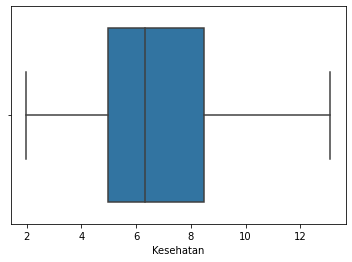

In [226]:
sns.boxplot('Kesehatan', data=df2);

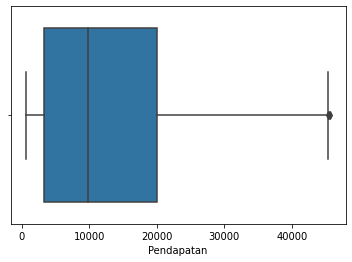

In [227]:
sns.boxplot('Pendapatan', data=df2);

In [228]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df2)
df_std

array([[ 0.32723934, -0.95709347],
       [-0.08751004, -0.31188312],
       [-1.04586298, -0.08156163],
       [-1.57738646, -0.62440688],
       [-0.29689808,  0.39924416],
       [ 0.53662738,  0.36822443],
       [-0.95324904, -0.56236743],
       [ 0.79030903,  2.12859403],
       [ 1.70436835,  2.2681828 ],
       [-0.35729847,  0.15884126],
       [ 0.45206682,  0.69393158],
       [-0.72372754,  2.10532923],
       [-1.30759802, -0.89272754],
       [ 0.48428037,  0.10455674],
       [-0.46601918,  0.17435113],
       [ 1.58356756,  2.10532923],
       [-0.6311136 , -0.47085923],
       [-1.07404983, -0.94080812],
       [-0.6311136 , -0.58408124],
       [-0.77607455, -0.66240605],
       [ 1.74463528, -0.32816848],
       [ 0.61716124, -0.05054191],
       [ 0.90305644,  0.04251728],
       [ 0.04134413,  0.10455674],
       [-0.01100287, -0.97105235],
       [ 1.94596993, -1.0227002 ],
       [-0.43783233, -0.88652359],
       [-0.65930045, -0.87566669],
       [ 1.82516914,

In [229]:
#clustering with KMeans

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0])

In [230]:
new_df = pd.DataFrame(data=df_std, columns=['Kesehatan', 'Pendapatan'])
new_df['label1_kmeans'] = labels1
new_df

,Kesehatan,Pendapatan,label1_kmeans
0,0.327239,-0.957093,0
1,-0.087510,-0.311883,0
2,-1.045863,-0.081562,0
3,-1.577386,-0.624407,0
4,-0.296898,0.399244,0
...,...,...,...
152,-0.610980,-0.853177,0
153,-0.747888,0.197616,0
154,0.029264,-0.733751,0
155,-0.639167,-0.734527,0


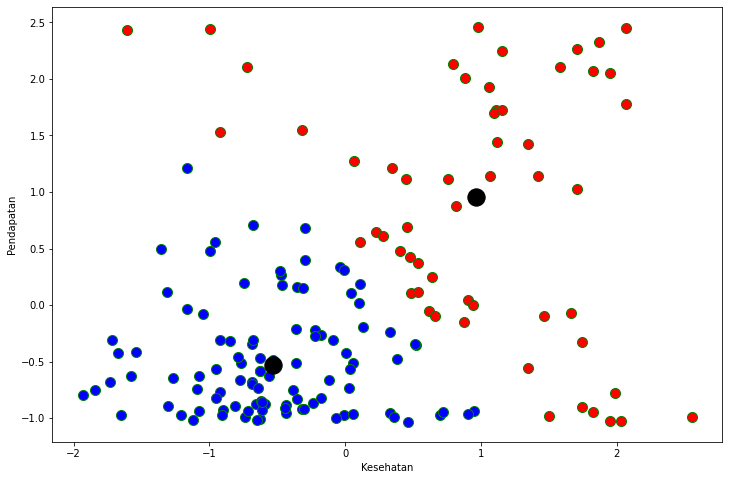

In [231]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Kesehatan'][new_df.label1_kmeans==0], new_df['Pendapatan'][new_df.label1_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Kesehatan'][new_df.label1_kmeans==1], new_df['Pendapatan'][new_df.label1_kmeans==1], c='red', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)
plt.xlabel('Kesehatan')
plt.ylabel('Pendapatan')
plt.show()

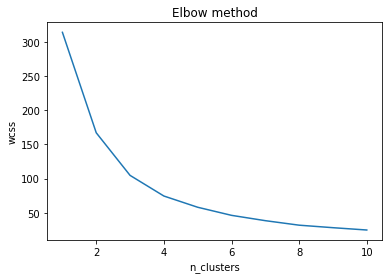

In [79]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

In [80]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_


In [81]:
new_df['label2_kmeans'] = labels2
new_df

,Kesehatan,Pendapatan,label1_kmeans,label2_kmeans
0,0.327239,-0.957093,0,0
1,-0.087510,-0.311883,0,3
2,-1.045863,-0.081562,0,3
3,-1.577386,-0.624407,0,3
4,-0.296898,0.399244,0,1
...,...,...,...,...
152,-0.610980,-0.853177,0,3
153,-0.747888,0.197616,0,1
154,0.029264,-0.733751,0,3
155,-0.639167,-0.734527,0,3


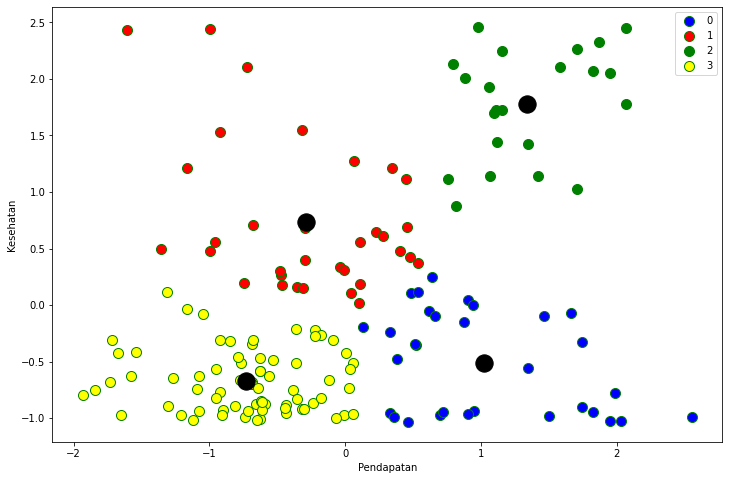

In [82]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Kesehatan'][new_df.label2_kmeans==0], new_df['Pendapatan'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Kesehatan'][new_df.label2_kmeans==1], new_df['Pendapatan'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['Kesehatan'][new_df.label2_kmeans==2], new_df['Pendapatan'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df['Kesehatan'][new_df.label2_kmeans==3], new_df['Pendapatan'][new_df.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.xlabel('Pendapatan')
plt.ylabel('Kesehatan')
plt.show()

In [83]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.45672849084282163
0.4544762214325836


In [84]:
from sklearn.cluster import KMeans
kmeansa = KMeans(n_clusters = 2, random_state=42)
kmeansa.fit(sc.inverse_transform(df_std))
labelsa = kmeansa.labels_
labelsa

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1])

In [85]:
kmeansb = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeansb = kmeansb.fit(df_std)
labelsb = kmeansb.labels_
labelsb

array([0, 3, 3, 3, 1, 1, 3, 2, 2, 1, 1, 1, 3, 0, 1, 2, 3, 3, 3, 3, 0, 0,
       0, 1, 3, 0, 3, 3, 2, 3, 3, 3, 1, 3, 0, 3, 0, 3, 0, 3, 1, 1, 1, 2,
       3, 0, 3, 3, 1, 3, 1, 3, 2, 2, 3, 3, 0, 2, 3, 2, 3, 3, 3, 0, 3, 3,
       1, 2, 3, 3, 1, 0, 2, 1, 2, 3, 2, 0, 1, 3, 0, 3, 3, 1, 1, 0, 0, 1,
       1, 0, 3, 3, 1, 3, 3, 2, 3, 1, 0, 3, 0, 3, 3, 3, 3, 3, 2, 2, 3, 3,
       1, 3, 0, 3, 3, 3, 1, 2, 1, 1, 0, 3, 1, 3, 0, 1, 0, 2, 2, 0, 0, 1,
       2, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 3, 3, 1, 3, 0, 0, 2, 0, 3, 3, 1,
       3, 3, 3])

In [86]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['Kesehatan', 'Pendapatan'])
new_df1['label1_kmeans'] = labelsa
new_df1['label2_kmeans'] = labelsb
new_df1

,Kesehatan,Pendapatan,label1_kmeans,label2_kmeans
0,7.58,1610.0,1,0
1,6.55,9930.0,1,3
2,4.17,12900.0,1,3
3,2.85,5900.0,1,3
4,6.03,19100.0,1,1
...,...,...,...,...
152,5.25,2950.0,1,3
153,4.91,16500.0,1,1
154,6.84,4490.0,1,3
155,5.18,4480.0,1,3


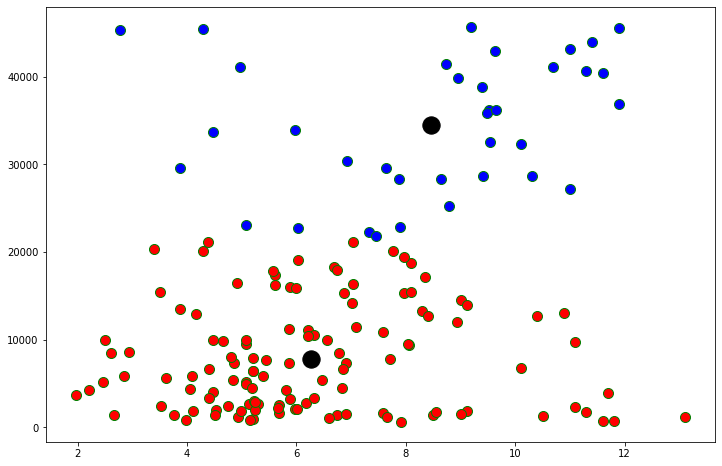

In [87]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['Kesehatan'][new_df1.label1_kmeans == 0], new_df1['Pendapatan'][new_df1.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['Kesehatan'][new_df1.label1_kmeans == 1], new_df1['Pendapatan'][new_df1.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )

plt.show()

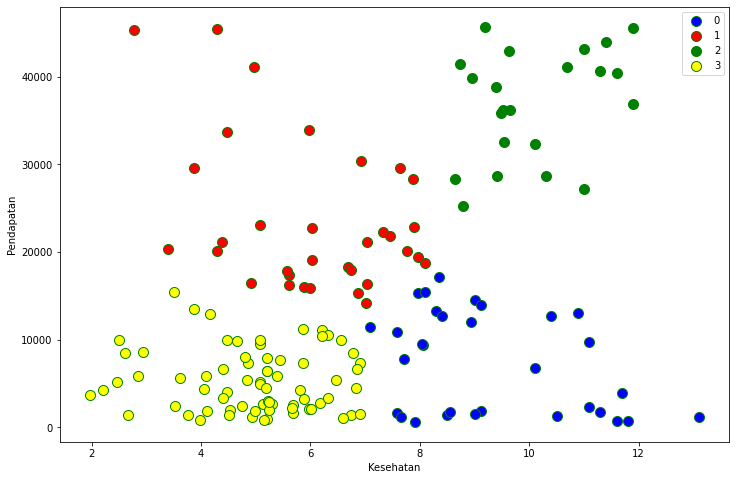

In [88]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['Kesehatan'][new_df1.label2_kmeans == 0], new_df1['Pendapatan'][new_df1.label2_kmeans == 0], c='blue', label='0', s=100, edgecolor='green')
plt.scatter(new_df1['Kesehatan'][new_df1.label2_kmeans == 1], new_df1['Pendapatan'][new_df1.label2_kmeans == 1], c='red', label='1', s=100, edgecolor='green')
plt.scatter(new_df1['Kesehatan'][new_df1.label2_kmeans == 2], new_df1['Pendapatan'][new_df1.label2_kmeans == 2], c='green',label = '2', s=100, edgecolor='green')
plt.scatter(new_df1['Kesehatan'][new_df1.label2_kmeans == 3], new_df1['Pendapatan'][new_df1.label2_kmeans == 3], c='yellow', label = '3', s=100, edgecolor='green')

# plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.xlabel('Kesehatan')
plt.ylabel('Pendapatan')
plt.show()

In [89]:
df3 = pd.merge(df,new_df1, how='outer')

df3['label2_kmeans'] = df3['label2_kmeans'].astype('object')
df3

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1.0,0.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1.0,3.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1.0,3.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,NaN,NaN
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,NaN,NaN,NaN,5.21,NaN,918.0,NaN,NaN,NaN,NaN,1.0,3.0
176,NaN,NaN,NaN,1.97,NaN,3720.0,NaN,NaN,NaN,NaN,1.0,3.0
177,NaN,NaN,NaN,2.77,NaN,45300.0,NaN,NaN,NaN,NaN,0.0,1.0
178,NaN,NaN,NaN,5.87,NaN,7290.0,NaN,NaN,NaN,NaN,1.0,3.0


In [95]:
top_tip = df3[df3['label2_kmeans']==3]
top_tip.dropna(inplace=True)

In [96]:
top_tip.sort_values(by=['Kesehatan'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
116,Pakistan,92.1,13.50,2.20,19.4,4280.0,10.90,65.3,3.85,1040.0,1.0,3.0
38,"Congo, Rep.",63.9,85.10,2.46,54.7,5190.0,20.70,60.4,4.95,2740.0,1.0,3.0
154,Turkmenistan,62.0,76.30,2.50,44.5,9940.0,2.31,67.9,2.83,4440.0,1.0,3.0
50,Eritrea,55.2,4.79,2.66,23.3,1420.0,11.60,61.7,4.61,482.0,1.0,3.0
140,Sri Lanka,11.2,19.60,2.94,26.8,8560.0,22.80,74.4,2.20,2810.0,1.0,3.0
55,Gabon,63.7,57.70,3.50,18.9,15400.0,16.60,62.9,4.08,8750.0,1.0,3.0
120,Philippines,31.9,34.80,3.61,36.6,5600.0,4.22,69.0,3.16,2130.0,1.0,3.0
93,Madagascar,62.2,25.00,3.77,43.0,1390.0,8.79,60.8,4.60,413.0,1.0,3.0
31,Central African Republic,149.0,11.80,3.98,26.5,888.0,2.01,47.5,5.21,446.0,1.0,3.0
69,India,58.8,22.60,4.05,27.1,4410.0,8.98,66.2,2.60,1350.0,1.0,3.0


In [99]:
#summary

df['K_means_labels'] = pd.Series(labelsb).astype('object')

In [111]:
df['Kesehatan'].describe()

count    167.000000
mean       6.815689
std        2.746837
min        1.810000
25%        4.920000
50%        6.320000
75%        8.600000
max       17.900000
Name: Kesehatan, dtype: float64

In [121]:
top_tip = df[df['K_means_labels']==3]

In [122]:
top_tip

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,3
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758,3
...,...,...,...,...,...,...,...,...,...,...,...
151,Tonga,17.4,12.4,5.07,60.3,4980,3.68,69.9,3.91,3550,3
152,Tunisia,17.4,50.5,6.21,55.3,10400,3.82,76.9,2.14,4140,3
154,Turkmenistan,62.0,76.3,2.50,44.5,9940,2.31,67.9,2.83,4440,3
155,Uganda,81.0,17.1,9.01,28.6,1540,10.60,56.8,6.15,595,3


In [133]:
df_kesehatan = top_tip.sort_values(by=['Kesehatan'],ascending=True)[:10]
df_kesehatan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,3
154,Turkmenistan,62.0,76.3,2.50,44.5,9940,2.310,67.9,2.83,4440,3
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,3
115,Oman,11.7,65.7,2.77,41.2,45300,15.600,76.1,2.90,19300,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,3
140,Sri Lanka,11.2,19.6,2.94,26.8,8560,22.800,74.4,2.20,2810,3
55,Gabon,63.7,57.7,3.50,18.9,15400,16.600,62.9,4.08,8750,3
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,3
93,Madagascar,62.2,25.0,3.77,43.0,1390,8.790,60.8,4.60,413,3
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3


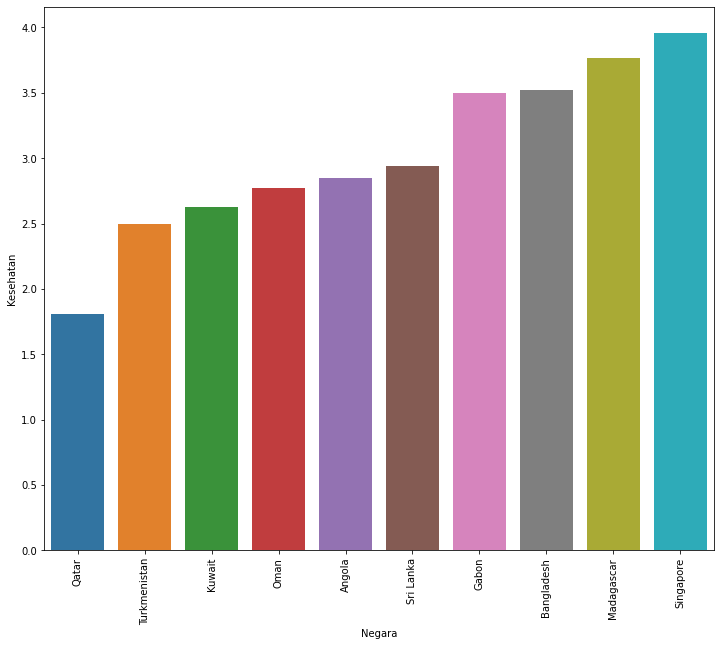

In [136]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x="Negara", y="Kesehatan", data=df_kesehatan);
ax.set_xticklabels(df_kesehatan['Negara'], rotation=90)
plt.show()

In [124]:
df_pendapatan = top_tip.sort_values(by=['Pendapatan'],ascending=True)[:10]
df_pendapatan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,3
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,3
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,3
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,3
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,3
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.790,60.8,4.60,413,3
155,Uganda,81.0,17.10,9.01,28.6,1540,10.600,56.8,6.15,595,3
81,Kiribati,62.7,13.30,11.30,79.9,1730,1.520,60.7,3.84,1490,3
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,3
109,Nepal,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592,3


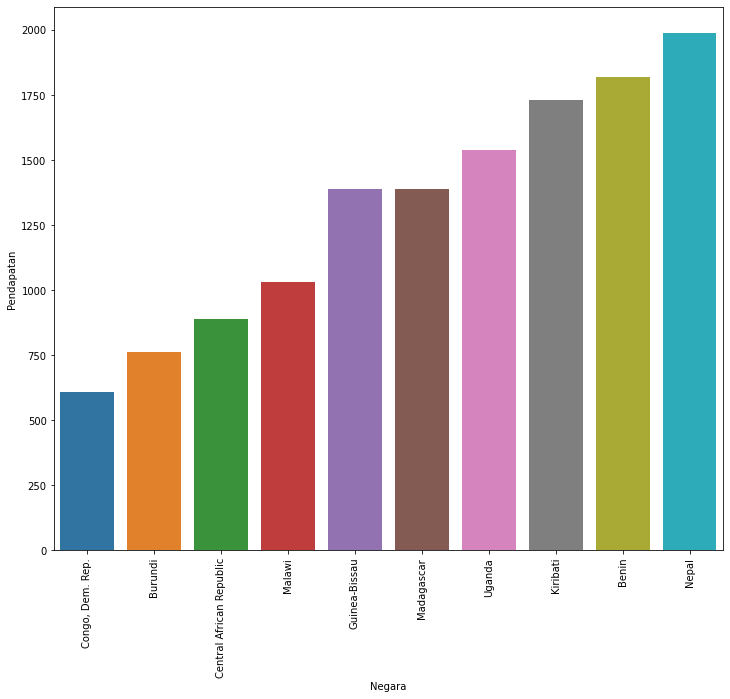

In [131]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x="Negara", y="Pendapatan", data=df_pendapatan);
ax.set_xticklabels(df_pendapatan['Negara'], rotation=90)
plt.show()

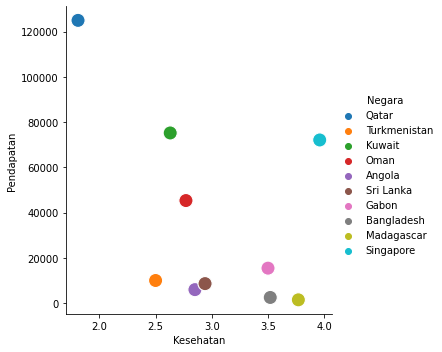

In [144]:
sns.relplot(x="Kesehatan", y="Pendapatan", hue="Negara", data=df_kesehatan, s=200);

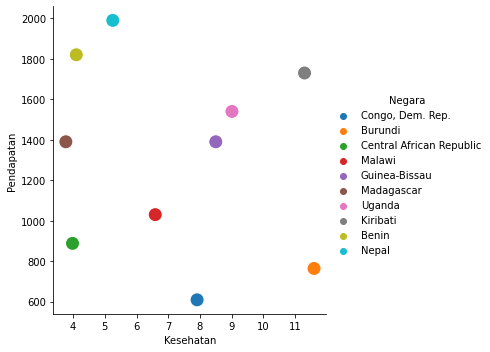

In [233]:
sns.relplot(x="Kesehatan", y="Pendapatan", hue="Negara", data=df_pendapatan, s=200);

# GDPperkapita vs Harapan Hidup

In [165]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df1 = pd.read_csv('Data_Negara_HELP.csv')

df1.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [166]:
df1.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [160]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final

In [167]:
print(finding_outlier(df1['GDPperkapita']))
print(finding_outlier(df1['Harapan_hidup']))

7       51900
8       46900
15      44400
23      35300
29      47400
44      58000
53      46200
54      40600
58      41800
68      41900
73      48700
75      35800
77      44500
82      38500
91     105000
110     50300
111     33700
114     87800
123     70300
133     46600
144     52100
145     74600
157     35000
158     38900
159     48400
Name: GDPperkapita, dtype: int64
31    47.5
66    32.1
87    46.5
Name: Harapan_hidup, dtype: float64


In [168]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
  return df_final

In [169]:
df4 = remove_outlier(df1[['GDPperkapita', 'Harapan_hidup']])

df4.dropna(axis=0, inplace=True)
df4

,GDPperkapita,Harapan_hidup
0,553.0,56.2
1,4090.0,76.3
2,4460.0,76.5
3,3530.0,60.1
4,12200.0,76.8
...,...,...
162,2970.0,63.0
163,13500.0,75.4
164,1310.0,73.1
165,1310.0,67.5


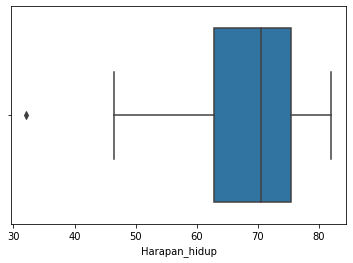

In [170]:
sns.boxplot('Harapan_hidup', data=df4);

In [172]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df4)

In [173]:
#clustering with KMeans

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [174]:
new_df = pd.DataFrame(data=df_std, columns=['GDPperkapita', 'Harapan_hidup'])
new_df['label1_kmeans'] = labels1
new_df

,GDPperkapita,Harapan_hidup,label1_kmeans
0,-0.816938,-1.490007,0
1,-0.317709,0.885714,1
2,-0.265485,0.909353,1
3,-0.396750,-1.029046,0
4,0.826975,0.944811,1
...,...,...,...
137,-0.475791,-0.686281,0
138,1.010463,0.779338,1
139,-0.710091,0.507490,0
140,-0.710091,-0.154403,0


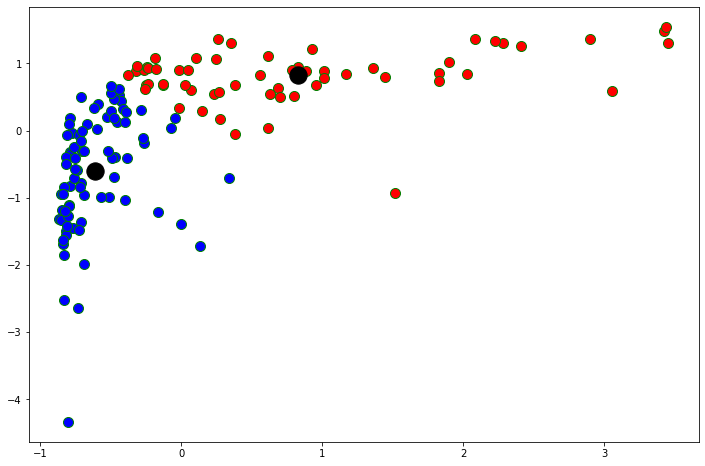

In [175]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['GDPperkapita'][new_df.label1_kmeans==0], new_df['Harapan_hidup'][new_df.label1_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df['GDPperkapita'][new_df.label1_kmeans==1], new_df['Harapan_hidup'][new_df.label1_kmeans==1], c='red', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)

plt.show()

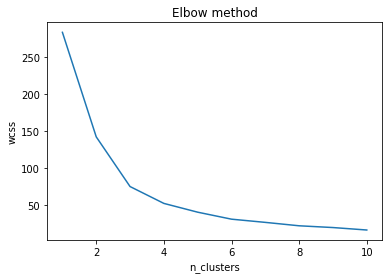

In [176]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

In [177]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_


In [178]:
new_df['label2_kmeans'] = labels2
new_df

,GDPperkapita,Harapan_hidup,label1_kmeans,label2_kmeans
0,-0.816938,-1.490007,0,3
1,-0.317709,0.885714,1,2
2,-0.265485,0.909353,1,2
3,-0.396750,-1.029046,0,3
4,0.826975,0.944811,1,2
...,...,...,...,...
137,-0.475791,-0.686281,0,0
138,1.010463,0.779338,1,2
139,-0.710091,0.507490,0,0
140,-0.710091,-0.154403,0,0


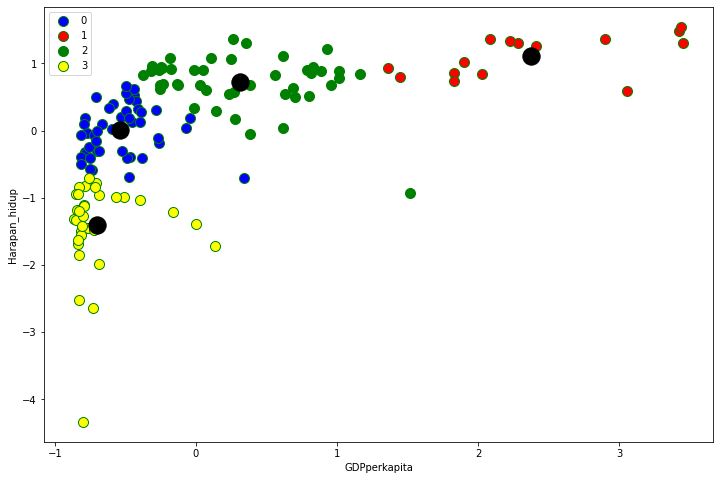

In [179]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['GDPperkapita'][new_df.label2_kmeans==0], new_df['Harapan_hidup'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['GDPperkapita'][new_df.label2_kmeans==1], new_df['Harapan_hidup'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['GDPperkapita'][new_df.label2_kmeans==2], new_df['Harapan_hidup'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df['GDPperkapita'][new_df.label2_kmeans==3], new_df['Harapan_hidup'][new_df.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.xlabel('GDPperkapita')
plt.ylabel('Harapan_hidup')
plt.show()

In [180]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.44908733749370133
0.44145107656593696


In [183]:
from sklearn.cluster import KMeans
kmeansa = KMeans(n_clusters = 2, random_state=42)
kmeansa.fit(sc.inverse_transform(df_std))
labelsa = kmeansa.labels_
labelsa

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [184]:
kmeansb = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeansb = kmeansb.fit(df_std)
labelsb = kmeansb.labels_
labelsb

array([3, 2, 2, 3, 2, 2, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 0, 2, 3, 2, 2, 3,
       3, 0, 3, 0, 3, 3, 2, 2, 2, 0, 3, 3, 2, 3, 2, 1, 1, 2, 2, 0, 0, 2,
       3, 2, 0, 0, 0, 0, 3, 1, 2, 0, 3, 3, 0, 3, 2, 0, 0, 2, 0, 1, 2, 2,
       2, 3, 3, 0, 0, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 1, 0, 2, 0, 0,
       0, 2, 0, 3, 0, 3, 0, 3, 3, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 2, 2, 3, 1, 1, 3, 3, 1, 1, 0, 2, 0, 2, 0, 3, 2, 0, 3, 0, 2, 2,
       0, 3, 0, 2, 0, 0, 2, 0, 0, 3])

In [213]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['GDPperkapita', 'Harapan_hidup'])
new_df1['label1_kmeans'] = labelsa
new_df1['label2_kmeans'] = labelsb
new_df1.describe()

,GDPperkapita,Harapan_hidup,label1_kmeans,label2_kmeans
count,142.000000,142.000000,142.000000,142.000000
mean,6340.943662,68.806338,0.225352,1.478873
std,7110.006849,8.490539,0.419293,1.189304
min,231.000000,32.100000,0.000000,0.000000
25%,1205.000000,62.825000,0.000000,0.000000
50%,3575.000000,70.450000,0.000000,2.000000
75%,8637.500000,75.475000,0.000000,2.000000
max,30800.000000,81.900000,1.000000,3.000000


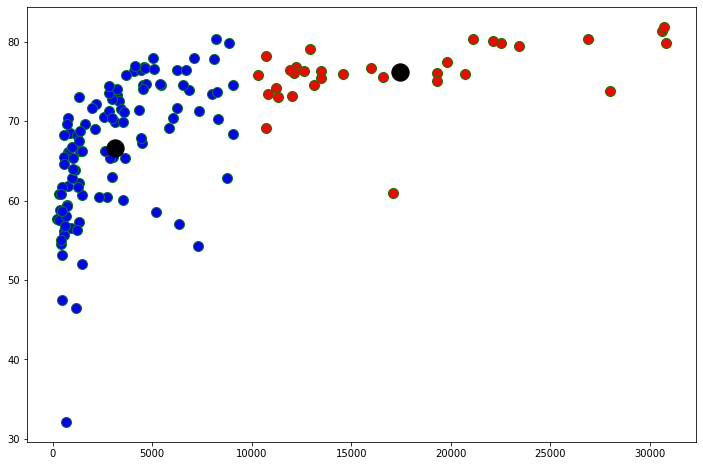

In [187]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['GDPperkapita'][new_df1.label1_kmeans == 0], new_df1['Harapan_hidup'][new_df1.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['GDPperkapita'][new_df1.label1_kmeans == 1], new_df1['Harapan_hidup'][new_df1.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )

plt.show()

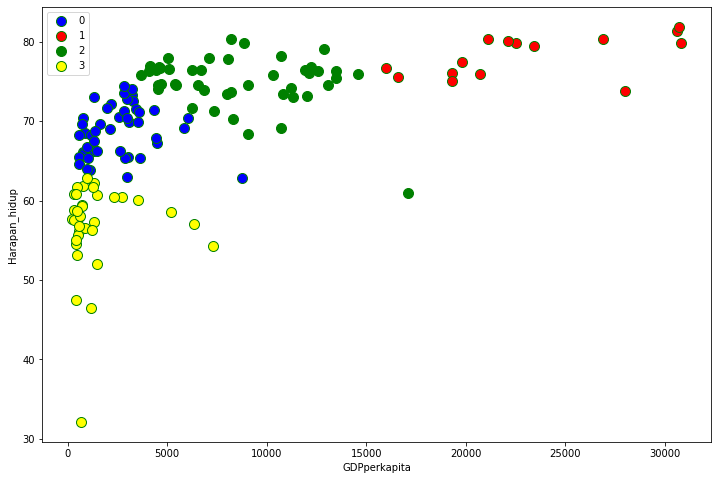

In [188]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['GDPperkapita'][new_df1.label2_kmeans == 0], new_df1['Harapan_hidup'][new_df1.label2_kmeans == 0], c='blue', label='0', s=100, edgecolor='green')
plt.scatter(new_df1['GDPperkapita'][new_df1.label2_kmeans == 1], new_df1['Harapan_hidup'][new_df1.label2_kmeans == 1], c='red', label='1', s=100, edgecolor='green')
plt.scatter(new_df1['GDPperkapita'][new_df1.label2_kmeans == 2], new_df1['Harapan_hidup'][new_df1.label2_kmeans == 2], c='green',label = '2', s=100, edgecolor='green')
plt.scatter(new_df1['GDPperkapita'][new_df1.label2_kmeans == 3], new_df1['Harapan_hidup'][new_df1.label2_kmeans == 3], c='yellow', label = '3', s=100, edgecolor='green')

# plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.xlabel('GDPperkapita')
plt.ylabel('Harapan_hidup')
plt.show()

In [190]:
df5 = pd.merge(df,new_df1, how='outer')

df5['label2_kmeans'] = df5['label2_kmeans'].astype('object')
df5

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0.0,3.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0.0,2.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0.0,2.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0.0,3.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,0.0,0.0
166,Zambia,83.1,37.0,5.89,30.9,3280.0,14.00,52.0,5.40,1460.0,0.0,3.0
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.5,NaN,2600.0,0.0,0.0
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.2,NaN,2650.0,0.0,0.0


In [191]:
top_gdp = df5[df5['label2_kmeans']==3]
top_gdp.dropna(inplace=True)

In [201]:
top_gdp.sort_values(by=['GDPperkapita'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,3
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,3
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,3
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553,3
27,Cambodia,44.4,54.10,5.68,59.5,2520,3.12,66.1,2.88,786,3
32,Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897,3
116,Pakistan,92.1,13.50,2.20,19.4,4280,10.90,65.3,3.85,1040,3
18,Bhutan,42.7,42.50,5.20,70.7,6420,5.99,72.1,2.38,2180,3
113,Nigeria,130.0,25.30,5.07,17.4,5150,104.00,60.5,5.84,2330,3
57,Georgia,16.5,35.00,10.10,52.8,6730,8.55,72.8,1.92,2960,3


In [207]:
#summary

df['K_means_labels'] = pd.Series(labelsb).astype('object')

In [208]:
top_gdp = df[df['K_means_labels']==3]

In [209]:
top_gdp.sort_values(by=['GDPperkapita'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,3
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,3
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,3
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553,3
27,Cambodia,44.4,54.10,5.68,59.5,2520,3.12,66.1,2.88,786,3
32,Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897,3
116,Pakistan,92.1,13.50,2.20,19.4,4280,10.90,65.3,3.85,1040,3
18,Bhutan,42.7,42.50,5.20,70.7,6420,5.99,72.1,2.38,2180,3
113,Nigeria,130.0,25.30,5.07,17.4,5150,104.00,60.5,5.84,2330,3
57,Georgia,16.5,35.00,10.10,52.8,6730,8.55,72.8,1.92,2960,3


In [210]:
df_gdp = top_gdp.sort_values(by=['GDPperkapita'],ascending=True)[:10]

df_gdp

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,3
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,3
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,3
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553,3
27,Cambodia,44.4,54.10,5.68,59.5,2520,3.12,66.1,2.88,786,3
32,Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897,3
116,Pakistan,92.1,13.50,2.20,19.4,4280,10.90,65.3,3.85,1040,3
18,Bhutan,42.7,42.50,5.20,70.7,6420,5.99,72.1,2.38,2180,3
113,Nigeria,130.0,25.30,5.07,17.4,5150,104.00,60.5,5.84,2330,3
57,Georgia,16.5,35.00,10.10,52.8,6730,8.55,72.8,1.92,2960,3


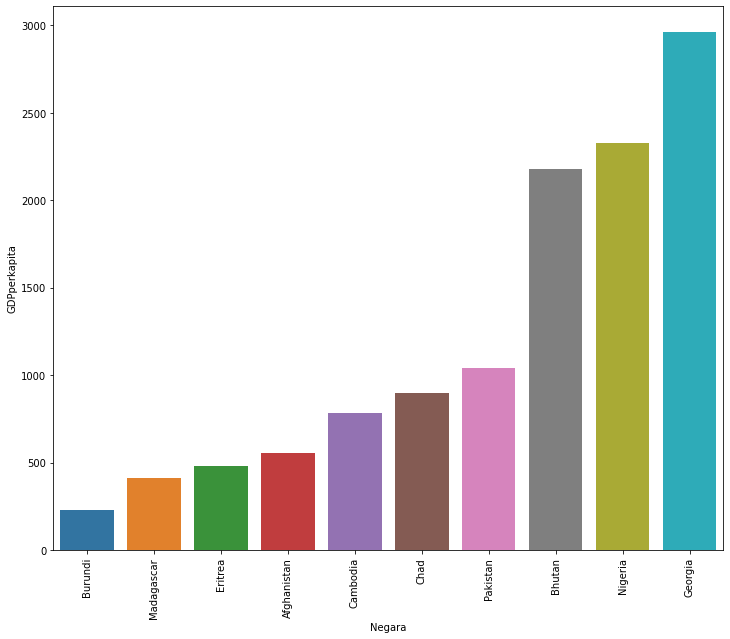

In [211]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x="Negara", y="GDPperkapita", data=df_gdp);
ax.set_xticklabels(df_gdp['Negara'], rotation=90)
plt.show()

In [212]:
df_harapanHidup = top_gdp.sort_values(by=['Harapan_hidup'],ascending=True)[:10]

df_harapanHidup

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553,3
32,Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897,3
21,Botswana,52.5,43.60,8.30,51.3,13300,8.92,57.1,2.88,6350,3
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,3
3,Angola,119.0,62.30,2.85,42.9,5900,22.40,60.1,6.16,3530,3
113,Nigeria,130.0,25.30,5.07,17.4,5150,104.00,60.5,5.84,2330,3
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,3
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,3
55,Gabon,63.7,57.70,3.50,18.9,15400,16.60,62.9,4.08,8750,3
116,Pakistan,92.1,13.50,2.20,19.4,4280,10.90,65.3,3.85,1040,3


<AxesSubplot:xlabel='Harapan_hidup'>

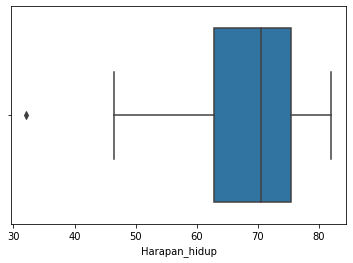

In [214]:
sns.boxplot(x='Harapan_hidup',data=new_df1)

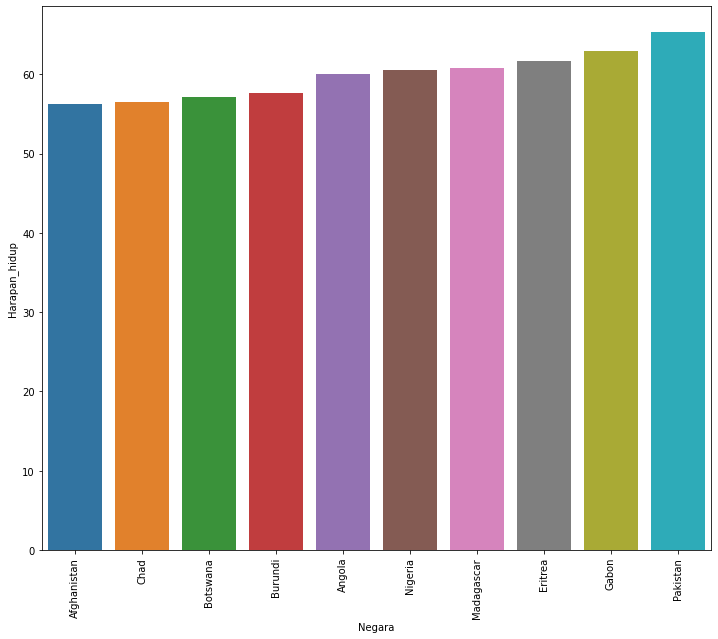

In [215]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x="Negara", y="Harapan_hidup", data=df_harapanHidup);
ax.set_xticklabels(df_harapanHidup['Negara'], rotation=90)
plt.show()

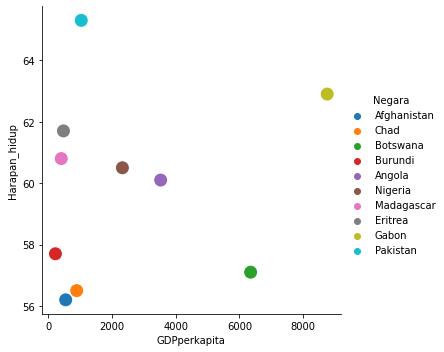

In [216]:
sns.relplot(x="GDPperkapita", y="Harapan_hidup", hue="Negara", data=df_harapanHidup, s=200);

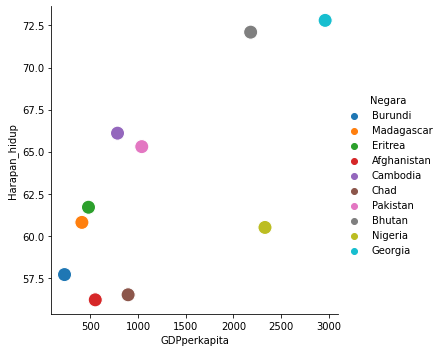

In [217]:
sns.relplot(x="GDPperkapita", y="Harapan_hidup", hue="Negara", data=df_gdp, s=200);